In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

%matplotlib inline

In [21]:
dataset = pd.read_csv("./Homework_Datasets/train.csv")

In [22]:
dataset.head()

,id,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,0,13.05,0.40,2.40,21.68,71.79,2.33,1.87,0.09,1.30,1.070000,1.13,2.45,96.79,1
1,1,13.01,3.66,2.21,16.53,98.87,2.46,2.34,0.28,1.49,3.690000,0.75,2.79,588.86,0
2,2,13.13,1.14,2.32,18.75,108.51,2.63,2.26,0.13,2.15,5.030000,0.86,2.66,954.80,0
3,3,12.06,1.41,2.04,16.58,73.52,0.84,-0.36,0.37,0.14,7.869999,0.37,1.01,194.88,2
4,4,12.35,1.14,1.91,19.52,77.65,2.09,1.98,0.27,1.03,4.620000,1.11,3.46,502.23,1


In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            534 non-null    int64  
 1   alcohol                       534 non-null    float64
 2   malic_acid                    534 non-null    float64
 3   ash                           534 non-null    float64
 4   alcalinity_of_ash             534 non-null    float64
 5   magnesium                     534 non-null    float64
 6   total_phenols                 534 non-null    float64
 7   flavanoids                    534 non-null    float64
 8   nonflavanoid_phenols          534 non-null    float64
 9   proanthocyanins               534 non-null    float64
 10  color_intensity               534 non-null    float64
 11  hue                           534 non-null    float64
 12  od280/od315_of_diluted_wines  534 non-null    float64
 13  proli

In [24]:
dataset['target'] = dataset['target'].apply(lambda x: 0 if x == 0 else 1)

In [25]:
dataset.describe()

,id,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000
mean,266.500000,12.596404,1.803371,2.233783,17.876180,92.548633,1.996723,1.534307,0.302210,1.305693,3.889401,0.852569,2.266685,592.646629,0.672285
std,154.296792,0.839504,1.129380,0.285172,3.376112,14.859507,0.652526,1.047399,0.127285,0.614343,2.349626,0.243022,0.740055,333.830211,0.469821
min,0.000000,10.400000,-0.270000,1.150000,7.990000,57.020000,0.630000,-0.490000,0.020000,-0.150000,-0.370000,0.350000,0.640000,9.800000,0.000000
25%,133.250000,11.920000,0.952500,2.050000,15.800000,81.322500,1.470000,0.555000,0.210000,0.892500,2.062500,0.680000,1.612500,352.725000,0.000000
50%,266.500000,12.605000,1.450000,2.230000,17.760000,90.840000,1.995000,1.590000,0.280000,1.260000,3.680000,0.870000,2.405000,521.920000,1.000000
75%,399.750000,13.240000,2.587500,2.430000,19.877500,100.627500,2.510000,2.387500,0.397500,1.640000,5.080000,1.030000,2.830000,807.565000,1.000000
max,533.000000,14.690000,5.570000,3.200000,28.740000,159.460000,3.840000,4.350000,0.620000,3.440000,12.800000,1.690000,3.900000,1654.830000,1.000000


target
1    359
0    175
Name: count, dtype: int64


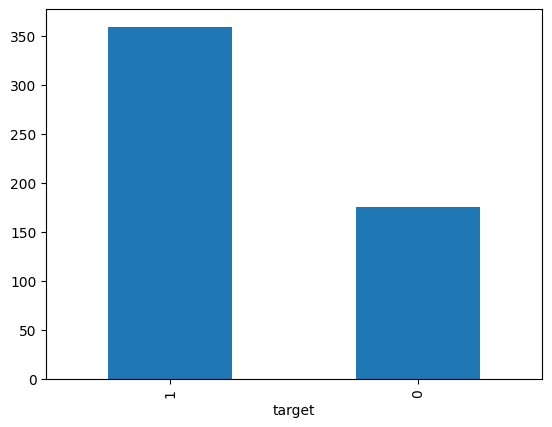

In [26]:
print(dataset.target.value_counts())
dataset.target.value_counts().plot(kind='bar')
plt.show()

<Axes: xlabel='target', ylabel='proline'>

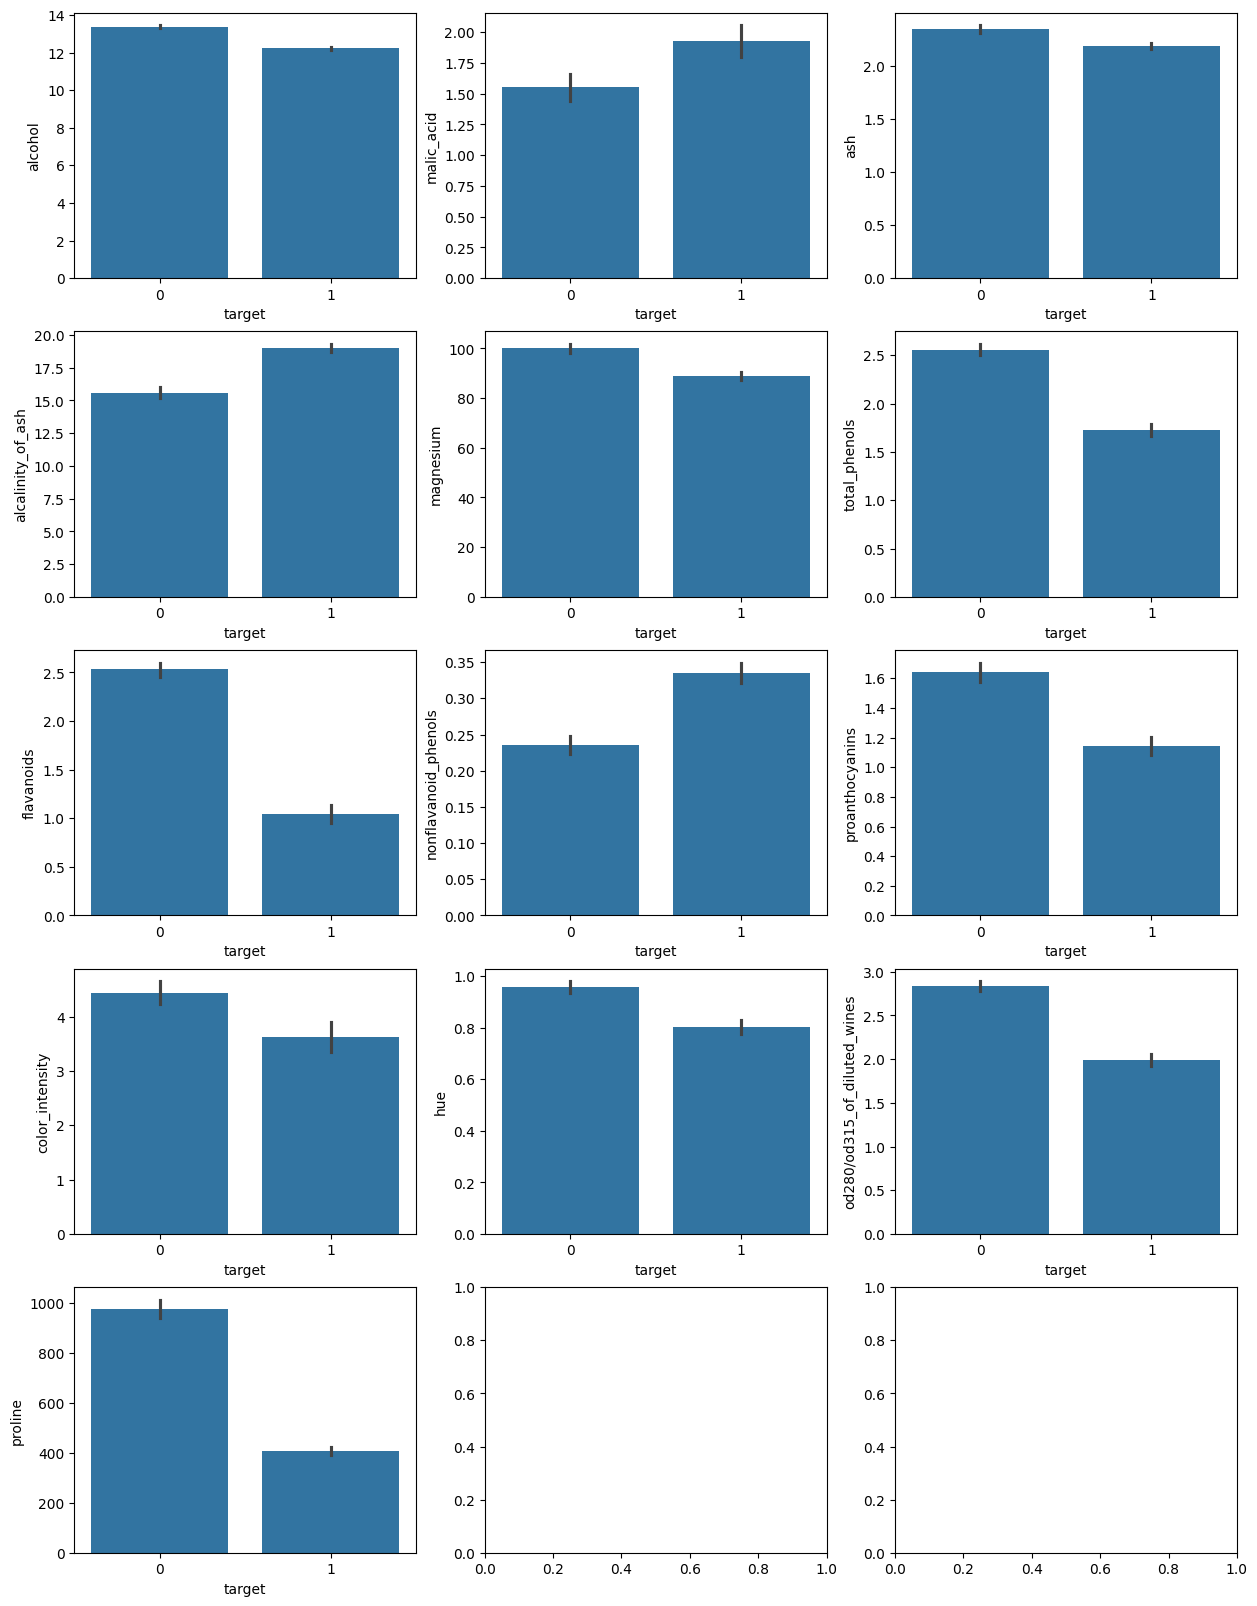

In [27]:
fig, ax = plt.subplots(5,3 , figsize = (15,20)) # Making Subplots

sns.barplot(data = dataset, y ="alcohol", x="target", ax=ax[0,0])
sns.barplot(data = dataset, y ="malic_acid", x="target", ax=ax[0,1])
sns.barplot(data = dataset, y ="ash", x="target", ax=ax[0,2])
sns.barplot(data = dataset, y ="alcalinity_of_ash", x="target", ax=ax[1,0])
sns.barplot(data = dataset, y ="magnesium", x="target", ax=ax[1,1])
sns.barplot(data = dataset, y ="total_phenols", x="target", ax=ax[1,2])
sns.barplot(data = dataset, y ="flavanoids", x="target", ax=ax[2,0])
sns.barplot(data = dataset, y ="nonflavanoid_phenols", x="target", ax=ax[2,1])
sns.barplot(data = dataset, y ="proanthocyanins", x="target", ax=ax[2,2])
sns.barplot(data = dataset, y ="color_intensity", x="target", ax=ax[3,0])
sns.barplot(data = dataset, y ="hue", x="target", ax=ax[3,1])
sns.barplot(data = dataset, y ="od280/od315_of_diluted_wines", x="target", ax=ax[3,2])
sns.barplot(data = dataset, y ="proline", x="target", ax=ax[4,0])

In [28]:
# Splitting datset to X and y axis 

X=dataset.iloc[: , 1:14].values
y=dataset.iloc[: ,-1].values

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [30]:
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [31]:
classifier = SVC(kernel='rbf', random_state = 42)
classifier.fit(X_train,y_train)

SVC(random_state=42)

In [32]:
y_pred=classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
final_classifier = classifier    # since max quality is for SVM so we have stored this in a final variable

In [33]:

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[46  0]
 [ 0 88]]


1.0

In [34]:
classifier = SVC(kernel='linear', random_state = 42)
classifier.fit(X_train,y_train)

SVC(kernel='linear', random_state=42)

In [35]:
y_pred=classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
final_classifier = classifier    # since max quality is for SVM so we have stored this in a final variable

In [36]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[46  0]
 [ 0 88]]


1.0

In [37]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids for different SVC models
svm_linear = {'C': [0.1, 1, 10, 100], 'kernel': ['linear']}
svm_others = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 'auto'],
              'kernel': ['poly', 'rbf', 'sigmoid']}

# Combine the parameter grids
parameters = [svm_linear, svm_others]

# Create an SVC model
svc_model = SVC()

# Perform grid search
grid_search = GridSearchCV(svc_model, param_grid=parameters, cv=5, verbose=2)
grid_search.fit(X, y)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best score: {best_score:.4f}")

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END ...............................C=0.1, kernel=linear; total time=   0.1s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.2s
[CV] END .................................C=1, kernel=linear; total time=   0.1s
[CV] END .................................C=1, kernel=linear; total time=   0.2s
[CV] END .................................C=1, kernel=linear; total time=   0.1s
[CV] END .................................C=1, kernel=linear; total time=   0.1s
[CV] END ................................C=10, kernel=linear; total time=   0.7s
[CV] END ................................C=10, 

In [39]:
# Retraining an SVC model with the best parameters
best_svc = SVC(C=10, kernel='linear')
best_svc.fit(X_train, y_train)

# Make predictions on the test data
svc_pred = best_svc.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test, svc_pred))

accuracy_score(y_test, svc_pred)

[[46  0]
 [ 0 88]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        88

    accuracy                           1.00       134
   macro avg       1.00      1.00      1.00       134
weighted avg       1.00      1.00      1.00       134



1.0